#### Import libraries

In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
from os import path
import numpy as np

#### Read the dataset 

In [2]:
import os 
os.getcwd()

'/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/2.-Mask_creation'

In [ ]:
path = '/home/kevin/Escritorio/Kevin/workspace/CRAI_hourly_infilling/WindData_Preprocessing/'
path_in = '1.-Output_Gridded_data/ERA5-Land_data/'
path_out = '3.-data_with_NAN_values_corrected/'
name_infile = 'WS_10m_ERA5Land_09_240x240_ms_2011_2024_1_12.nc' #'era5SL_010_144x144_kmh_1961-2021.nc'
name_outfile = 'era5SL_010_240x240_m_s_2011_2021.nc'  #'era5SL_010_144x144_m_s_2010-2021.nc'

f_kmh2ms = 1000.0/3600.0

ds = xr.open_dataset(path + path_in + name_infile)

#### Information of the dataset

In [4]:
print(ds)

<xarray.Dataset> Size: 57GB
Dimensions:    (time: 122736, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 982kB 2011-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    u10        (time, latitude, longitude) float32 28GB ...
    v10        (time, latitude, longitude) float32 28GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [6]:
print('Min Lon: ', ds.longitude.min().item())
print('Max Lon: ', ds.longitude.max().item())
print('Min Lat: ', ds.latitude.min().item())
print('Max Lat: ', ds.latitude.max().item())

Min Lon:  -19.0
Max Lon:  4.9
Min Lat:  25.0
Max Lat:  48.9


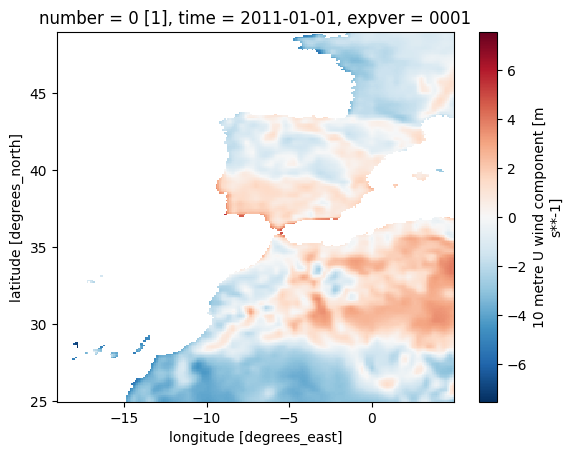

In [5]:
ds["u10"].isel(time=0).plot()

In [12]:
np.sqrt(4)

np.float64(2.0)

In [7]:
u10_vec = ds["u10"].values
v10_vec = ds["v10"].values

In [8]:
v10_vec

array([[[        nan,         nan,         nan, ..., -0.3262787 ,
         -0.29014587, -0.2530365 ],
        [        nan,         nan,         nan, ..., -0.29405212,
         -0.24717712, -0.20030212],
        [        nan,         nan,         nan, ..., -0.27549744,
         -0.21202087, -0.15440369],
        ...,
        [        nan,         nan,         nan, ..., -2.9874115 ,
         -2.9766693 , -2.9297943 ],
        [        nan,         nan,         nan, ..., -2.9444427 ,
         -2.870224  , -2.7422943 ],
        [        nan,         nan,         nan, ..., -2.8018646 ,
         -2.7432709 , -2.5850677 ]],

       [[        nan,         nan,         nan, ..., -0.6910095 ,
         -0.6636658 , -0.63046265],
        [        nan,         nan,         nan, ..., -0.60409546,
         -0.558197  , -0.5074158 ],
        [        nan,         nan,         nan, ..., -0.558197  ,
         -0.48788452, -0.41854858],
        ...,
        [        nan,         nan,         nan, ..., -

In [9]:
ws_vec = np.sqrt(u10_vec**2 + v10_vec**2)

In [10]:
ws_vec

array([[[       nan,        nan,        nan, ..., 1.0175363 ,
         1.0411832 , 1.0712674 ],
        [       nan,        nan,        nan, ..., 0.98340756,
         1.0129805 , 1.0552562 ],
        [       nan,        nan,        nan, ..., 0.975209  ,
         1.0030713 , 1.0484798 ],
        ...,
        [       nan,        nan,        nan, ..., 3.1597395 ,
         3.2073123 , 3.285222  ],
        [       nan,        nan,        nan, ..., 3.3797069 ,
         3.4385324 , 3.5262015 ],
        [       nan,        nan,        nan, ..., 3.6347458 ,
         3.709527  , 3.7692425 ]],

       [[       nan,        nan,        nan, ..., 1.0010659 ,
         0.9961497 , 0.991575  ],
        [       nan,        nan,        nan, ..., 0.9643282 ,
         0.95914453, 0.9609977 ],
        [       nan,        nan,        nan, ..., 0.922984  ,
         0.9109136 , 0.9145794 ],
        ...,
        [       nan,        nan,        nan, ..., 3.2365592 ,
         3.2820687 , 3.2998376 ],
        [   

In [ ]:
del(u10_vec)

In [15]:
del(v10_vec)

In [11]:
ws_vec.shape

(122736, 240, 240)

In [21]:
ds["ws"] = ws_vec

MissingDimensionsError: cannot set variable 'ws' with 3-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [16]:
ds["ws"] = (("time", "latitude", "longitude"), ws_vec)

In [21]:
print(ds)

<xarray.Dataset> Size: 85GB
Dimensions:    (time: 122736, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 982kB 2011-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    u10        (time, latitude, longitude) float32 28GB nan nan ... 1.244 0.8389
    v10        (time, latitude, longitude) float32 28GB nan nan ... 2.23 3.099
    ws         (time, latitude, longitude) float32 28GB nan nan ... 2.554 3.211
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0

In [22]:
ds = ds.drop_vars(["u10", "v10"])

In [23]:
print(ds)

<xarray.Dataset> Size: 28GB
Dimensions:    (time: 122736, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 982kB 2011-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 28GB nan nan ... 2.554 3.211
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


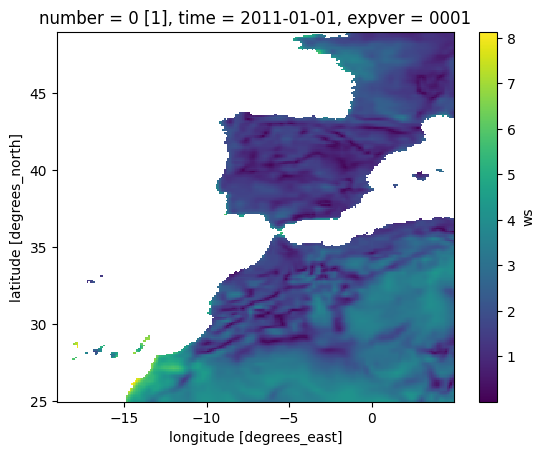

In [24]:
ds["ws"].isel(time=0).plot()

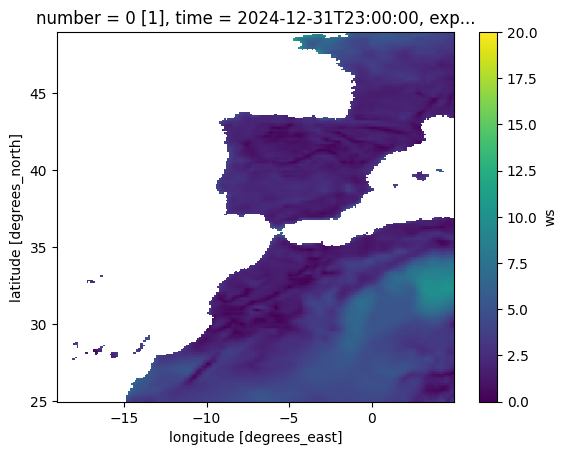

In [25]:
ds["ws"].isel(time=-1).plot(vmin=0, vmax=20)

#### Split the data (in time) set to make it manageable

In [26]:
ds

<xarray.Dataset> Size: 28GB
Dimensions:    (time: 122736, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 982kB 2011-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 28GB nan nan ... 2.554 3.211
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...

In [28]:
print(ds)

<xarray.Dataset> Size: 28GB
Dimensions:    (time: 122736, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 982kB 2011-01-01 ... 2024-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 28GB nan nan ... 2.554 3.211
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [29]:
ds = ds.sel(time=slice("2011-01-01", "2021-12-31"))

In [30]:
print(ds)

<xarray.Dataset> Size: 22GB
Dimensions:    (time: 96432, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 22GB nan nan ... 5.585 5.242
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [31]:
print('Max ws value: ', ds["ws"].max())
print('Min ws value: ', ds["ws"].min())

Max ws value:  <xarray.DataArray 'ws' ()> Size: 8B
array(22.28882599)
Coordinates:
    number   int64 8B ...
Min ws value:  <xarray.DataArray 'ws' ()> Size: 8B
array(0.00010688)
Coordinates:
    number   int64 8B ...


In [34]:
time = ds["time"]
long = ds["longitude"]
lat = ds["latitude"]
ws_data = ds["ws"]

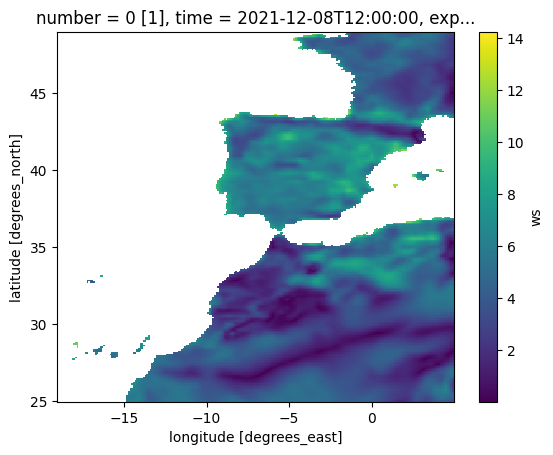

In [32]:
ds.isel(time=-564)["ws"].plot()

#### Check for Nan values

In [35]:
#print("ws_data: ", ws_data.count()) -> Count non-null values
print("ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]))
print("NULL ws_data: ", ws_data.isnull().sum().item())
print("Non-null ws_data: ", ws_data.count().item())
print("Non-null ws_data: ", (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2]) - ws_data.isnull().sum().item())
print()
print("Rate: ")
print("Null ws_data", (ws_data.isnull().sum() * 100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())
print("Non-null ws_data: ", (ws_data.count() *  100 / (ws_data.shape[0] * ws_data.shape[1] * ws_data.shape[2])).item())

#ws_data_cleaned = ws_data.where(ws_data.isnull()==False, 0)

ws_data:  5554483200
NULL ws_data:  2926036176
Non-null ws_data:  2628447024
Non-null ws_data:  2628447024

Rate: 
Null ws_data 52.67881944444444
Non-null ws_data:  47.32118055555556


ws_data:  90885888
NULL ws_data:  0
Non-null ws_data:  90885888
Non-null ws_data:  90885888

Rate: 
Null ws_data 0.0
Non-null ws_data:  100.0

#### Save the data

In [39]:
print(ds)

<xarray.Dataset> Size: 22GB
Dimensions:    (time: 96432, latitude: 240, longitude: 240)
Coordinates:
    number     int64 8B ...
  * time       (time) datetime64[ns] 771kB 2011-01-01 ... 2021-12-31T23:00:00
  * latitude   (latitude) float64 2kB 48.9 48.8 48.7 48.6 ... 25.2 25.1 25.0
  * longitude  (longitude) float64 2kB -19.0 -18.9 -18.8 -18.7 ... 4.7 4.8 4.9
    expver     (time) <U4 2MB ...
Data variables:
    ws         (time, latitude, longitude) float32 22GB nan nan ... 5.585 5.242
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-06T15:24 GRIB to CDM+CF via cfgrib-0.9.1...


In [40]:
ds.to_netcdf(path + path_out + name_outfile)